# microRNA scoring

This is the way that I evaluate my microRNAs
For this I am using the DE results with the log fold change
The impact of the microRNAs on the genes
The prescence of the genes in the muscle, and
The pathwyas of the genes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cityblock
from sklearn.cluster import SpectralClustering


In [3]:
from jupyter_functions import *

In [4]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting/network'

First we get the influence.
It is define as lists with +1 if it promotes the gene and -1 if it inhibits.
This already includes the pre selection of mirnas by pagerank and influence in general.
It has the genes on the columns and the rows are the microRNAs. The column final has the total of times the microRNA gets to a gene. 

In [5]:
influence_df = pd.read_csv(f"../mirna_influence_147_genes_impact.csv", index_col=0)

In [6]:
influence_df

,MYC,TERT,SPI1,BGLAP,STAT5A,IL2,RELA,FAS,IL3,STAT1,...,IFNL2,EIF5A,DEFB124,KCNA4,LAMC1,ESAM,ITGA2,PEG3,TNFSF12,final
hsa-miR-21-5p,"[-1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1...","[-1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1...","[-1, -1, 1]","[1, 1, 1, -1, -1, 1, -1, -1]","[-1, -1, 1, 1, -1, 1, 1]","[-1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-1, 1, 1, -1, 1, 1, -1, 1, 1, 1]","[-1, -1, -1, 1, 1, 1, 1, 1, 1, 1]","[-1, -1, 1, 1, 1]",...,"[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]",9528
hsa-miR-210-3p,"[-1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1,...","[-1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1,...","[-1, -1, 1]","[-1, 1, 1, -1, 1, 1, -1, -1]","[-1, -1, -1, -1, 1, 1, -1]","[-1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, ...","[-1, -1, -1, -1, -1, 1, 1, 1, 1, -1]","[-1, -1, -1, -1, -1, -1, -1, 1, 1, -1]","[-1, -1, 1, 1, 1, 1, 1, 1, -1, -1]","[-1, -1, 1, 1, 1]",...,"[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]",9528
hsa-miR-145-5p,"[-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...","[-1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1...","[-1, -1, -1, -1, -1, -1]","[1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, ...","[1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1]","[-1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, ...","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, ...","[1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1...","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, ...","[1, 1, 1, -1, 1, 1, 1, 1, -1, 1]",...,"[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]","[-1, -1, -1, -1, -1, -1, -1, -1]",19056
hsa-miR-143-3p,"[-1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, ...","[-1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1...","[-1, -1, -1]","[1, 1, -1, -1, 1, 1, -1, -1]","[1, 1, 1, 1, 1, -1, -1]","[-1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1]","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1]","[1, 1, -1, 1, -1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, -1]",...,"[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]","[-1, -1, -1, -1]",9528
hsa-miR-128-3p,"[-1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1,...","[-1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1,...","[-1, -1, 1]","[-1, 1, 1, -1, 1, 1, -1, -1]","[-1, -1, -1, -1, 1, 1, -1]","[-1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, ...","[-1, -1, -1, -1, -1, 1, 1, 1, 1, -1]","[-1, -1, -1, -1, -1, -1, -1, 1, 1, -1]","[-1, -1, 1, 1, 1, 1, 1, 1, -1, -1]","[-1, -1, 1, 1, 1]",...,"[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]",9549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-200a-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
hsa-miR-221-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
hsa-miR-182-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
hsa-miR-148a-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26


Now we get the log fold change of the genes

In [7]:
redulation_df = pd.read_csv('../data/RNAseq_abundance_adjusted_combat_inmose_all_lfc.csv', index_col=0)


In [8]:
redulation_df

,yo,ym,mo,ml_c,ml_s
gene,,,,,
CFH,-0.266518,NaN,NaN,NaN,NaN
SEMA3F,-4.102241,NaN,-3.743393,NaN,NaN
CFTR,-3.346279,NaN,-4.146497,NaN,NaN
RAD52,-0.556749,NaN,NaN,NaN,NaN
MYH16,7.573264,NaN,5.626051,NaN,NaN
...,...,...,...,...,...
Unnamed: 34254,-2.382550,NaN,NaN,NaN,NaN
Unnamed: 34260,-3.038266,NaN,NaN,NaN,NaN
Unnamed: 34273,-2.750935,NaN,-4.449913,NaN,NaN


There are 3456 genes on the influence_df, and in the de  there are 3555.

We can meassure the desired effect by multiplying the impact (integer) of the microRNA of the gene by the lfc of the gene in the younger state vs the older state.

If the gene is downregulated (negative lfc) in young, that means that the desired impact (in theory) will be to reduce it, therefore we look for a negative impact (inhibition) 
-1 * -1 = 1 

Siminarly, if it is updegulated (positive lfc) we want it to increase (positive impact)
1 * 1 = 1 

Any other combination is undesirable. 


For this, we multiply the lfc for the impact. 

In [9]:
int_influence_df = get_impact_data(influence_df)



In [10]:
int_influence_df = int_influence_df.T

In [11]:
int_influence_df = int_influence_df.merge(redulation_df, how='inner', left_index=True, right_index=True)


In [12]:
int_influence_df.drop(columns=['ml_c', 'ml_s'], inplace=True)
int_influence_df = int_influence_df.fillna(0)

We have 4 messurments from this
- Overall (sum)
- yo
- ym
- mo

And we addeded a 5th measuemrnet, how many desiable impact we have. For each cell, we would have a value between 0 and 3, 0 meanning no desiable impacts, and 3 impacting yo, ym and mo as expected.



In [13]:
int_influence_df


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p,yo,ym,mo
MYC,7,-5,-22,-9,-5,-10,-10,7,-5,-9,...,0,0,0,0,0,0,0,-5.335859,0.000000,-3.763937
IL3,4,2,-4,-2,2,-2,-2,6,2,-2,...,0,0,0,0,0,0,0,-4.019191,-6.029074,0.000000
PLAG1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-14.722988,-10.025135,-4.697853
IL12B,-3,-7,2,1,-7,1,1,-1,-7,1,...,0,0,0,0,0,0,0,-2.465440,4.129774,-6.595214
PDLIM7,-1,-1,2,-1,-1,-1,-1,-3,-1,-1,...,0,0,0,0,0,0,0,0.379850,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDX1,4,4,-8,-4,4,-4,-4,4,4,-4,...,0,0,0,0,0,0,0,3.423767,0.000000,0.000000
HOXC4,4,4,-8,-4,4,-4,-4,4,4,-4,...,0,0,0,0,0,0,0,-2.700432,0.000000,-3.560292
TACSTD2,4,4,-8,-4,4,-4,-4,4,4,-4,...,0,0,0,0,0,0,0,-2.594675,0.000000,-4.307017
ESAM,4,4,-8,-4,4,-4,-4,4,4,-4,...,0,0,0,0,0,0,0,0.601625,0.000000,0.000000


In [14]:
measurements= calculate_measurements(int_influence_df)
for m in measurements:
    display(m.head())

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
MYC,7,-5,-22,-9,-5,-10,-10,7,-5,-9,...,0,0,0,0,0,0,0,0,0,0
IL3,4,2,-4,-2,2,-2,-2,6,2,-2,...,0,0,0,0,0,0,0,0,0,0
PLAG1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IL12B,-3,-7,2,1,-7,1,1,-1,-7,1,...,0,0,0,0,0,0,0,0,0,0
PDLIM7,-1,-1,2,-1,-1,-1,-1,-3,-1,-1,...,0,0,0,0,0,0,0,0,0,0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
MYC,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IL3,-24.116297,-12.058149,24.116297,12.058149,-12.058149,12.058149,12.058149,-36.174446,-12.058149,12.058149,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PLAG1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
IL12B,-12.389321,-28.908417,8.259548,4.129774,-28.908417,4.129774,4.129774,-4.129774,-28.908417,4.129774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PDLIM7,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
MYC,-26.347560,18.819686,82.806617,33.875434,18.819686,37.639371,37.639371,-26.347560,18.819686,33.875434,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
IL3,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PLAG1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
IL12B,19.785642,46.166499,-13.190428,-6.595214,46.166499,-6.595214,-6.595214,6.595214,46.166499,-6.595214,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PDLIM7,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
MYC,-37.351011,26.679294,117.388892,48.022729,26.679294,53.358587,53.358587,-37.351011,26.679294,48.022729,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
IL3,-16.076763,-8.038382,16.076763,8.038382,-8.038382,8.038382,8.038382,-24.115145,-8.038382,8.038382,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PLAG1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
IL12B,7.396321,17.258082,-4.930881,-2.465440,17.258082,-2.465440,-2.465440,2.465440,17.258082,-2.465440,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PDLIM7,-0.379850,-0.379850,0.759700,-0.379850,-0.379850,-0.379850,-0.379850,-1.139550,-0.379850,-0.379850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
MYC,0,2,2,2,2,2,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
IL3,0,0,2,2,0,2,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
PLAG1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IL12B,2,2,1,1,2,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PDLIM7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
mir_scores=[]
for m in measurements:
    mir_score = m.sum()
    mir_scores.append(mir_score)
mir_scores_df = pd.DataFrame(mir_scores)


All of prevouis considers all the genes, but we want to focous now on those genes that are muscle specific

In [16]:
tissue_data = pd.read_csv("../data/tissue_category_rna_Any_Tissue.tsv", sep='\t',  index_col=0)

In [17]:
tissue_columns = []
for name in tissue_data.columns:
    if 'Tissue RNA - ' in name:
        tissue_columns.append(name)


tissue_data_tissues = tissue_data[tissue_columns]
row_sums = tissue_data_tissues.sum(axis=1)

# Divide each value by the sum of its row
tissue_data_tissues = tissue_data_tissues.div(row_sums, axis=0)


In [19]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting/network'

In [20]:
tissue_data_tissues.to_csv("../data/gene_tissue.csv")

In [21]:
tissue_data_tissues

,Tissue RNA - adipose tissue [nTPM],Tissue RNA - adrenal gland [nTPM],Tissue RNA - amygdala [nTPM],Tissue RNA - appendix [nTPM],Tissue RNA - basal ganglia [nTPM],Tissue RNA - bone marrow [nTPM],Tissue RNA - breast [nTPM],Tissue RNA - cerebellum [nTPM],Tissue RNA - cerebral cortex [nTPM],Tissue RNA - cervix [nTPM],...,Tissue RNA - spinal cord [nTPM],Tissue RNA - spleen [nTPM],Tissue RNA - stomach 1 [nTPM],Tissue RNA - testis [nTPM],Tissue RNA - thymus [nTPM],Tissue RNA - thyroid gland [nTPM],Tissue RNA - tongue [nTPM],Tissue RNA - tonsil [nTPM],Tissue RNA - urinary bladder [nTPM],Tissue RNA - vagina [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000083,0.000083,0.000000,0.000083,0.000000,0.000083,0.000083,0.000000,0.000250,0.000083,...,0.000000,0.000584,0.000083,0.000000,0.000000,0.000083,0.000000,0.000000,0.000000,0.000000
A1CF,0.000000,0.000000,0.000000,0.002079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.035712,0.014485,0.005301,0.011920,0.006890,0.000451,0.023398,0.001573,0.008586,0.018008,...,0.007881,0.019212,0.013624,0.004678,0.004293,0.016107,0.022489,0.004719,0.066852,0.012699
A2ML1,0.000181,0.000091,0.001812,0.000000,0.002265,0.000181,0.003624,0.000544,0.001903,0.102655,...,0.000453,0.000091,0.000634,0.004349,0.002628,0.000091,0.000000,0.045393,0.000997,0.179940
A4GNT,0.002907,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005814,0.668605,0.000000,0.000000,0.005814,0.000000,0.000000,0.002907,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWILCH,0.012131,0.006885,0.008525,0.026885,0.009836,0.033443,0.021311,0.011475,0.016066,0.015410,...,0.009180,0.017705,0.017705,0.171475,0.045246,0.012459,0.009508,0.044918,0.017377,0.013115
ZWINT,0.006601,0.006093,0.003808,0.038588,0.004316,0.104341,0.015994,0.001015,0.008124,0.009393,...,0.004570,0.012440,0.030972,0.064483,0.107642,0.009647,0.001523,0.081239,0.012186,0.010663
ZXDC,0.018895,0.014382,0.005922,0.016920,0.006486,0.109983,0.017202,0.010998,0.018049,0.021997,...,0.007614,0.024253,0.018613,0.017484,0.027637,0.023407,0.026509,0.016356,0.016638,0.015228


In [83]:
muscle_series = tissue_data_tissues['Tissue RNA - skeletal muscle [nTPM]']
muscle_genes = muscle_series[muscle_series>0.25]
muscle_genes = list(muscle_genes.index)


In [84]:
len(muscle_genes)

307

In [85]:
int_influence_muscle_df=int_influence_df[int_influence_df.index.isin(muscle_genes)]
len(int_influence_muscle_df)

10

In [86]:
measurements_muscle= calculate_measurements(int_influence_muscle_df)


In [87]:
 measument_names = ['influence_weight', 'influence_weigh_ym', 'influence_weigh_mo', 'influence_weigh_yo', 'influence_quantity']

In [88]:
mir_scores_muscle=[]
for m in measurements_muscle:
    mir_score = m.sum()
    mir_scores_muscle.append(mir_score)
mir_scores_muscle_df = pd.DataFrame(mir_scores_muscle)

In [89]:
mir_scores_muscle_df['score']=measument_names
mir_scores_muscle_df.set_index('score')

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
score,,,,,,,,,,,,,,,,,,,,,
influence_weight,7.000000,1.000000,-22.000000,-11.000000,1.000000,-11.000000,-11.000000,11.000000,1.000000,-11.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
influence_weigh_ym,-0.382571,-1.147714,0.765143,0.382571,-1.147714,0.382571,0.382571,0.382571,-1.147714,0.382571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
influence_weigh_mo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
influence_weigh_yo,20.282359,6.517378,-42.801928,-21.400964,6.517378,-21.400964,-21.400964,21.675387,6.517378,-21.400964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
influence_quantity,6.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,8.000000,4.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
mir_scores_df['score']=measument_names
mir_scores_df.set_index('score')

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,hsa-miR-29c-3p,...,hsa-miR-19a-3p,hsa-miR-376c-3p,hsa-miR-199a-3p,hsa-miR-429,hsa-miR-126-3p,hsa-miR-200a-3p,hsa-miR-221-3p,hsa-miR-182-5p,hsa-miR-148a-3p,hsa-miR-103a-3p
score,,,,,,,,,,,,,,,,,,,,,
influence_weight,541.000000,133.000000,-1250.000000,-643.000000,130.000000,-644.000000,-648.000000,676.000000,123.000000,-644.000000,...,-4.000000,-12.000000,-5.000000,-1.000000,-3.000000,-3.000000,-4.000000,-3.000000,-4.000000,-1.000000
influence_weigh_ym,-13.820679,-237.139043,43.715479,-5.045823,-237.139043,-5.045823,-5.045823,23.252993,-247.371928,-5.045823,...,-4.449432,-40.595698,0.000000,-22.416174,0.000000,-22.416174,0.000000,0.000000,4.534843,0.000000
influence_weigh_mo,-618.283654,129.302283,1584.470148,813.637346,139.578825,811.062175,817.805461,-769.603516,161.940264,807.298238,...,6.500580,38.743416,3.370069,8.393625,0.000000,8.393625,5.860759,0.000000,4.578352,0.000000
influence_weigh_yo,-754.210011,-159.847249,1977.100871,975.818895,-149.848833,970.572318,978.010051,-861.094772,-139.248271,964.872407,...,8.015383,-9.905134,3.909683,-14.022549,0.211297,-13.469184,6.371818,0.988103,7.549984,0.160418
influence_quantity,285.000000,334.000000,413.000000,417.000000,336.000000,417.000000,417.000000,286.000000,336.000000,417.000000,...,4.000000,11.000000,4.000000,1.000000,2.000000,3.000000,5.000000,3.000000,6.000000,1.000000


If we do the dot plot only on those in muscle

genes 10
mirnas 10


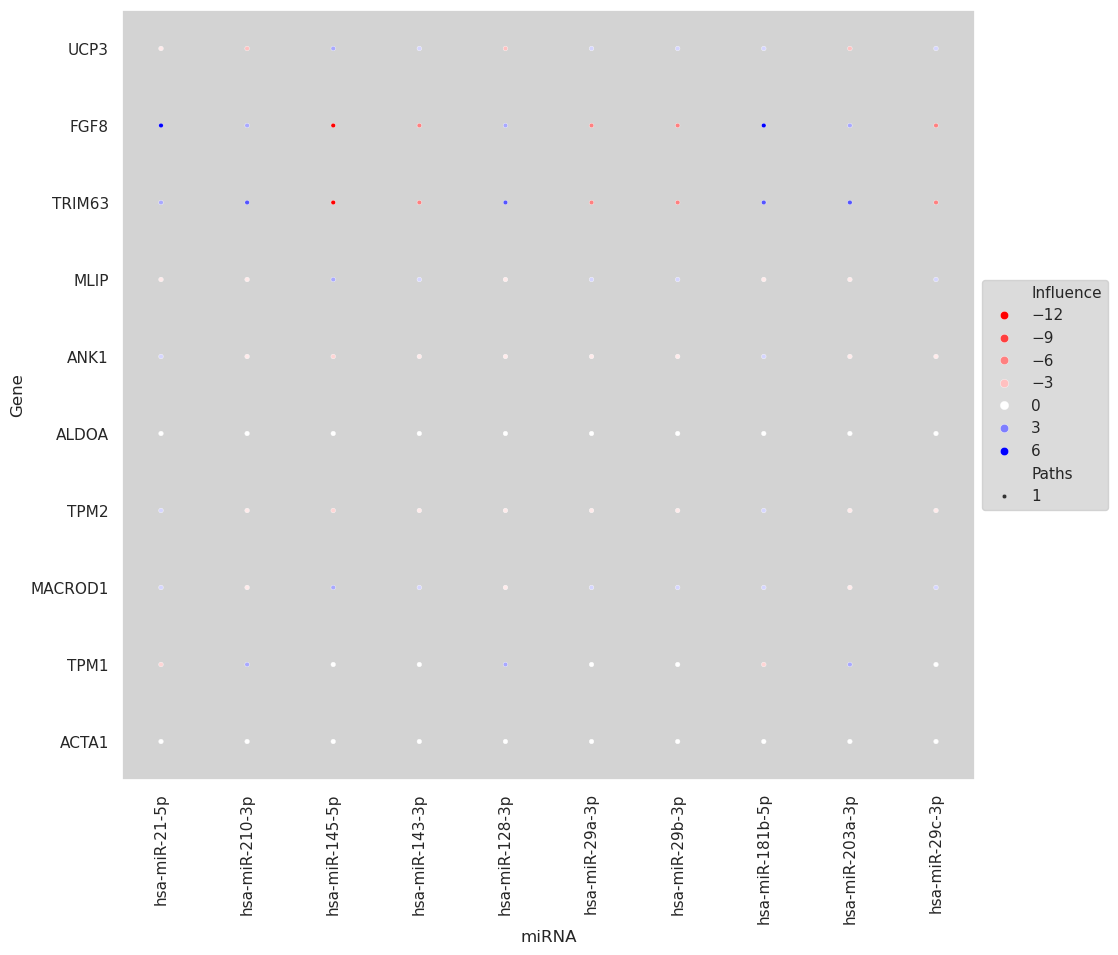

In [92]:
plot_dotplot(int_influence_muscle_df.iloc[:, : 10],gene_scale=0.7, mirna_scale=1 )

In [91]:
int_influence_muscle_df.iloc[:,-3:]

,yo,ym,mo
UCP3,0.350788,0.382571,0.0
FGF8,3.214747,0.000000,0.0
TRIM63,0.345726,0.000000,0.0
MLIP,-0.205278,0.000000,0.0
ANK1,0.353437,0.000000,0.0
ALDOA,0.512077,0.000000,0.0
TPM2,0.264208,0.000000,0.0
MACROD1,0.434009,0.000000,0.0
TPM1,0.301860,0.000000,0.0
ACTA1,0.331606,0.000000,0.0


But there are genes on different stages that we may want a different effect.
Therefore, we can see the curve that the gene has.

In [74]:
theshold = 0.5
up_regulated = int_influence_muscle_df[
    (int_influence_muscle_df['ym'] > theshold) | 
    (int_influence_muscle_df['mo'] > theshold) | 
    (int_influence_muscle_df['yo'] > theshold)].copy()


In [75]:

# Add the 'sum' column
up_regulated['sum'] = up_regulated[['yo', 'ym', 'mo']].sum(axis=1)

up_regulated=up_regulated.sort_values(by='sum')
up_regulated.drop(columns=['sum'], inplace=True)
up_regulated[['yo','ym','mo']]

,yo,ym,mo
FGF8,3.214747,0.0,0.0


genes 9
mirnas 15


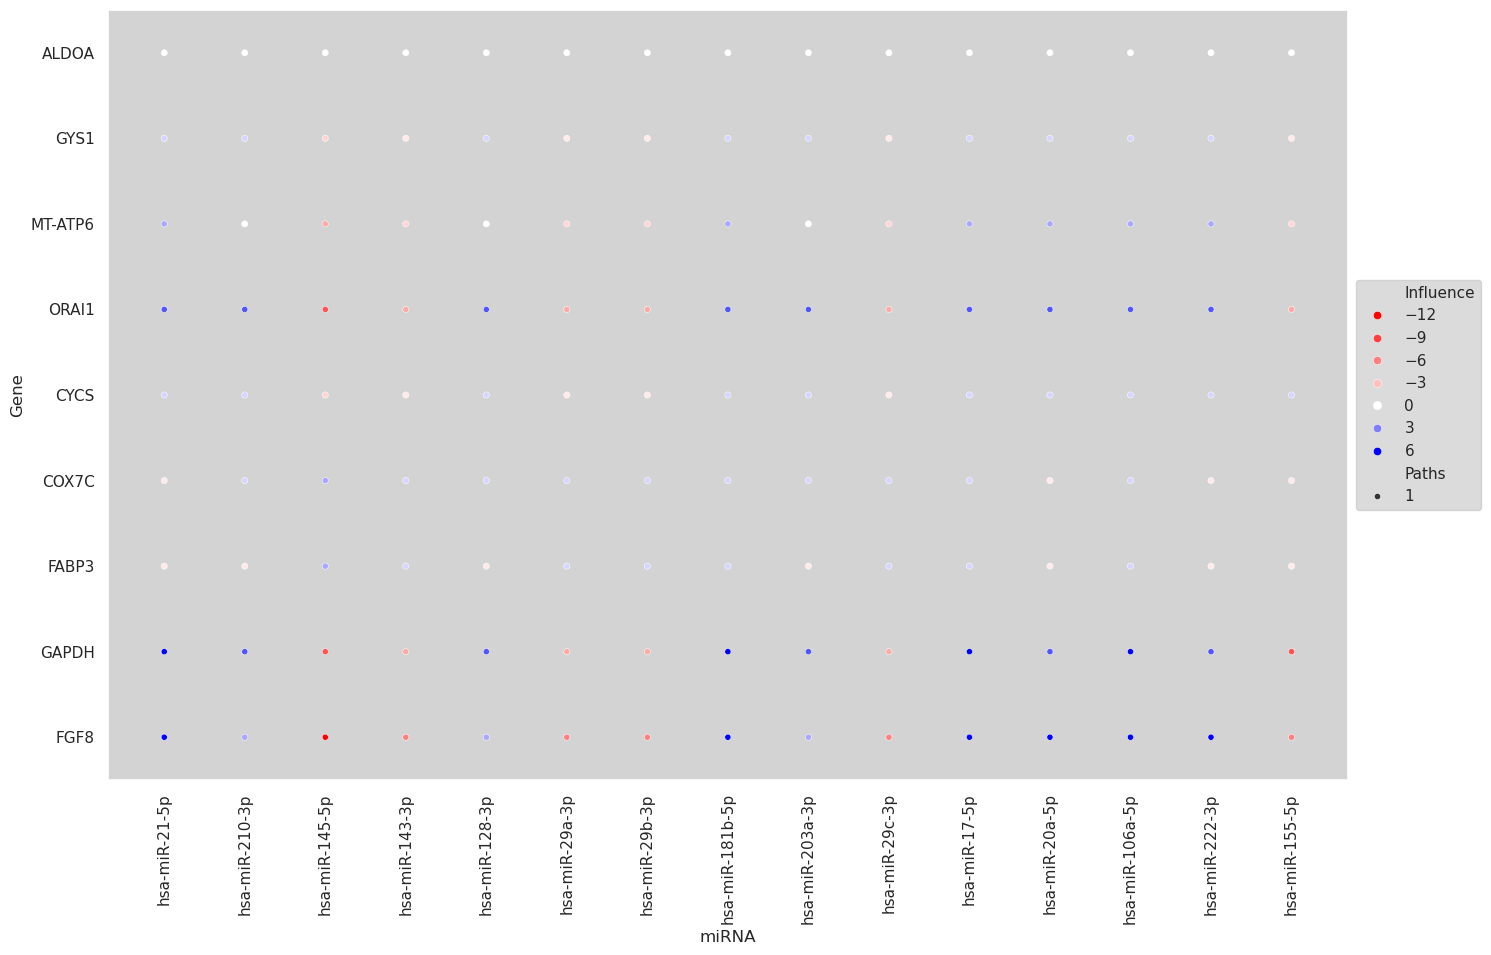

In [78]:
plot_dotplot(up_regulated.iloc[:, : 15],gene_scale=0.7, mirna_scale=1 )

In [ ]:
theshold = -2
down_regulated = int_influence_muscle_df[
    (int_influence_muscle_df['ym'] < theshold) 
    | (int_influence_muscle_df['mo'] < theshold) 
    | (int_influence_muscle_df['yo'] < theshold)
]


In [73]:
down_regulated['sum']=down_regulated['yo']+down_regulated['ym']+down_regulated['mo']
down_regulated=down_regulated.sort_values(by='sum')
down_regulated.drop(columns=['sum'], inplace=True)
down_regulated[['yo','ym','mo']]

,yo,ym,mo
FOXD3,-5.159955,-4.919748,0.000000
PNPLA2,-3.910201,0.000000,-5.557912
OPRK1,-3.216436,0.000000,-5.243079
CCR3,-4.422275,0.000000,-3.278089
HOXC4,-2.700432,0.000000,-3.560292
HIF1AN,-2.185676,0.000000,0.000000


genes 6
mirnas 15


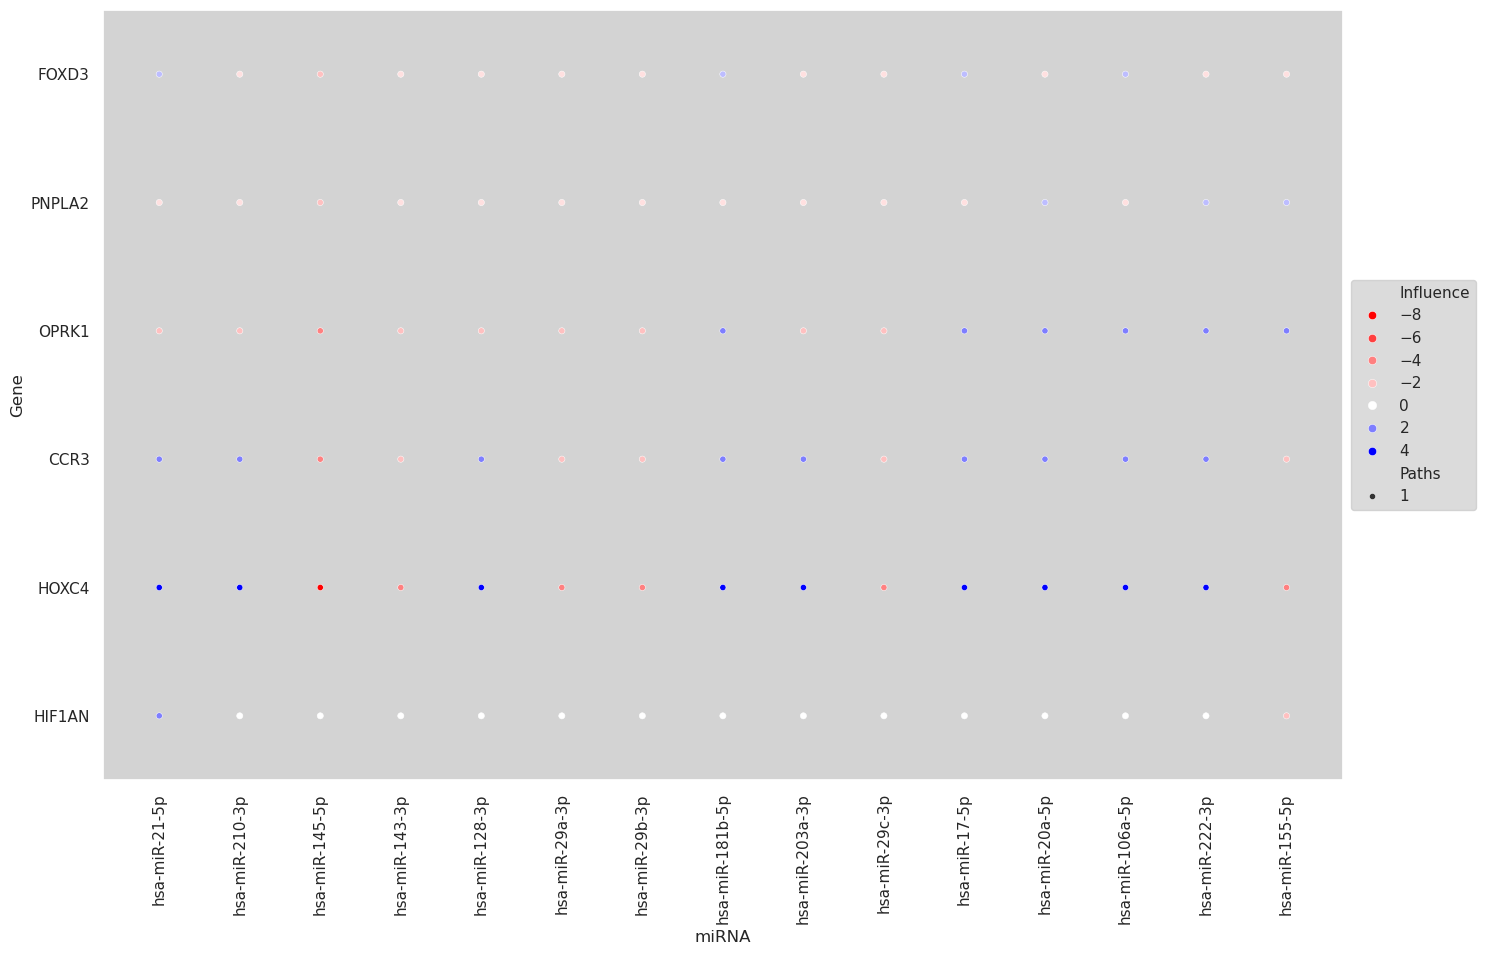

In [74]:
plot_dotplot(down_regulated.iloc[:, : 15],gene_scale=0.7, mirna_scale=1 )